In [346]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')
%matplotlib inline


In [347]:
train = pd.read_csv("train.csv") #Reading the dataset in a dataframe using Pandas
test = pd.read_csv("test.csv")

In [348]:
test['Loan_Status'] = np.nan

In [349]:
#joining bot train and test for data preparation
alldata=pd.concat([train, test]).reset_index(drop=True)


In [350]:
alldata.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [351]:

# Total Income matters for Loan amount and loan amount term
alldata['TotalIncome'] = alldata['ApplicantIncome'] + alldata['CoapplicantIncome']

In [352]:
x=alldata.apply(lambda x: sum(x.isnull()),axis=0)
print(x)

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
TotalIncome            0
dtype: int64


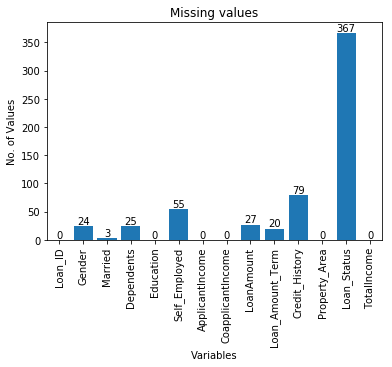

In [353]:
ind = np.arange(14)
ax=x.plot(kind='bar',grid='false')
ax.set_xlabel('Variables')
ax.set_title('Missing values')
ax.set_ylabel('No. of Values')
x = ax.bar(ind, x.values)
for rect in x:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 1*height,'%d' % int(height),ha='center', va='bottom')

Text(0,0.5,'Loan Amount')

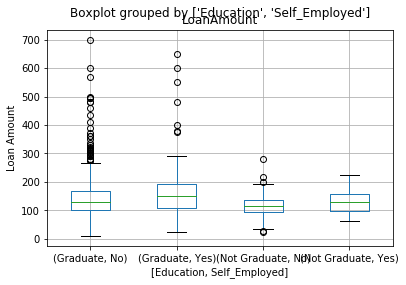

In [354]:

### From my sense Loan Amount is dependent on Employment and education
### supervised learning model to predict loan amount on the basis of other variables

ax = alldata.boxplot(column='LoanAmount', by=['Education','Self_Employed'])
ax.set_ylabel('Loan Amount')

In [355]:

# 55 Self_employed value is missing so first imputing it with Mode and Median
alldata['Self_Employed'].fillna(alldata['Self_Employed'].mode().iloc[0],inplace=True)

alldata['Gender'].fillna(alldata['Gender'].mode().iloc[0],inplace=True)

alldata['Credit_History'].fillna(alldata['Credit_History'].median(),inplace=True)

In [356]:
# Loan amount Imputation with respect to 'Self_Employed' & 'Education'
# pivot table, which provides us mean values for all the groups of unique values of Self_Employed and Education features
table = alldata.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.mean)

# Define function to return value of this pivot_table
def fage(x):
    return table.loc[x['Self_Employed'],x['Education']]
print(table)

Education        Graduate  Not Graduate
Self_Employed                          
No             145.820827    116.702703
Yes            174.241758    131.560000


In [357]:
# pivot table, which provides us median values for all the groups of unique values of Self_Employed and Education features
table2 = alldata.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)

# Define function to return value of this pivot_table
def fage2(x):
    return table2.loc[x['Self_Employed'],x['Education']]
print(table2)

Education      Graduate  Not Graduate
Self_Employed                        
No                130.0         117.0
Yes               150.0         130.0


In [358]:

# Replace missing values of Loan Amount
alldata['LoanAmount'].fillna(alldata[alldata['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

In [359]:
alldata['Married'].fillna(alldata['Married'].mode().iloc[0],inplace=True)

Text(0,0.5,'LoanAmount')

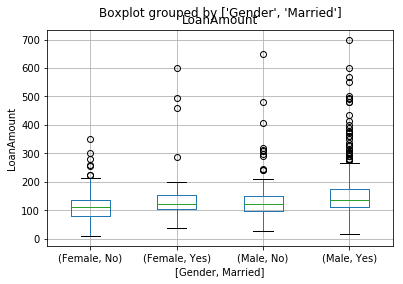

In [360]:
az = alldata.boxplot(column='LoanAmount', by=['Gender','Married'])
az.set_ylabel('LoanAmount')


In [361]:
alldata.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
TotalIncome          float64
dtype: object

In [362]:
alldata['Dependents'] = alldata['Dependents'].replace('3+','3')

In [363]:
x=alldata.apply(lambda x: sum(x.isnull()),axis=0)
print(x)

Loan_ID                0
Gender                 0
Married                0
Dependents            25
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term      20
Credit_History         0
Property_Area          0
Loan_Status          367
TotalIncome            0
dtype: int64


In [364]:
#pd.to_numeric(alldata['Dependents'],errors='coerce')

In [365]:
alldata['Dependents'] = alldata['Dependents'].astype(float)

Text(0,0.5,'Dependents')

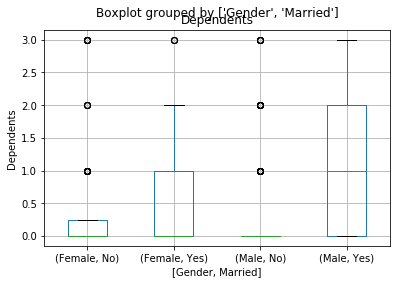

In [366]:
ay = alldata.boxplot(column='Dependents', by=['Gender','Married'])
ay.set_ylabel('Dependents')

In [367]:
pvtable = alldata.pivot_table(values='Dependents', index='Gender' ,columns='Married', aggfunc=np.median)

# Define function to return value of this pivot_table
def dep(x):
    return pvtable.loc[x['Gender'],x['Married']]
print(pvtable)

Married   No  Yes
Gender           
Female   0.0  0.0
Male     0.0  1.0


In [368]:
alldata['Dependents'].fillna(alldata[alldata['Dependents'].isnull()].apply(dep,axis=1),inplace=True)

In [369]:
alldata['Loan_Amount_Term'].fillna(alldata['Loan_Amount_Term'].median(),inplace=True)

In [370]:
alldata['LoanAmount_Log']=np.log(alldata['LoanAmount'])

In [371]:
alldata['TotalIncome_log'] = np.log(alldata['TotalIncome'])

In [372]:
#we can see almost all missing values are imputed
alldata.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
TotalIncome            0
LoanAmount_Log         0
TotalIncome_log        0
dtype: int64

In [373]:
alldata.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
TotalIncome          float64
LoanAmount_Log       float64
TotalIncome_log      float64
dtype: object

In [374]:
### converting all our categorical variables into numeric by encoding the categories
cols = ['Gender','Married','Education','Self_Employed','Property_Area']
le = LabelEncoder()
for i in cols:
    alldata[i] = le.fit_transform(alldata[i])

alldata.to_csv('alldata.csv', index=False)

alldata = pd.read_csv("alldata.csv", index_col="Loan_ID")

In [375]:
### split the merged data file into train and test respectively
train_set = alldata[~pd.isnull(alldata.Loan_Status)]
test_set = alldata[pd.isnull(alldata.Loan_Status)]

In [376]:
### set target variable
train_set['Loan_Status'] = [1 if x == 'Y' else 0 for x in train_set['Loan_Status']]

In [380]:
test_set.reset_index(drop=True, inplace=True)

In [381]:
alldata.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,LoanAmount_Log,TotalIncome_log
0,LP001002,1,0,0.0,0,0,5849,0.0,145.820827,360.0,1.0,2,Y,5849.0,4.982379,8.674026
1,LP001003,1,1,1.0,0,0,4583,1508.0,128.000000,360.0,1.0,0,N,6091.0,4.852030,8.714568
2,LP001005,1,1,0.0,0,1,3000,0.0,66.000000,360.0,1.0,2,Y,3000.0,4.189655,8.006368
3,LP001006,1,1,0.0,1,0,2583,2358.0,120.000000,360.0,1.0,2,Y,4941.0,4.787492,8.505323
4,LP001008,1,0,0.0,0,0,6000,0.0,141.000000,360.0,1.0,2,Y,6000.0,4.948760,8.699515


In [382]:
train_set.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,LoanAmount_Log,TotalIncome_log
0,LP001002,1,0,0.0,0,0,5849,0.0,145.820827,360.0,1.0,2,1,5849.0,4.982379,8.674026
1,LP001003,1,1,1.0,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,6091.0,4.852030,8.714568
2,LP001005,1,1,0.0,0,1,3000,0.0,66.000000,360.0,1.0,2,1,3000.0,4.189655,8.006368
3,LP001006,1,1,0.0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1,4941.0,4.787492,8.505323
4,LP001008,1,0,0.0,0,0,6000,0.0,141.000000,360.0,1.0,2,1,6000.0,4.948760,8.699515


In [383]:
test_set.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,LoanAmount_Log,TotalIncome_log
0,LP001015,1,1,0.0,0,0,5720,0.0,110.0,360.0,1.0,2,NaN,5720.0,4.700480,8.651724
1,LP001022,1,1,1.0,0,0,3076,1500.0,126.0,360.0,1.0,2,NaN,4576.0,4.836282,8.428581
2,LP001031,1,1,2.0,0,0,5000,1800.0,208.0,360.0,1.0,2,NaN,6800.0,5.337538,8.824678
3,LP001035,1,1,2.0,0,0,2340,2546.0,100.0,360.0,1.0,2,NaN,4886.0,4.605170,8.494129
4,LP001051,1,0,0.0,1,0,3276,0.0,78.0,360.0,1.0,2,NaN,3276.0,4.356709,8.094378


test_set.index = test_set['Loan_ID']

In [404]:
alldata.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,LoanAmount_Log,TotalIncome_log
count,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000
mean,0.814475,0.646279,0.782875,0.222222,0.121305,5179.795107,1601.916330,142.452069,342.564730,0.849134,1.053007,6781.711437,4.848377,8.649904
std,0.388921,0.478368,1.026562,0.415952,0.326648,5695.104533,2718.772806,76.404691,64.482011,0.358101,0.801302,6023.952550,0.468451,0.520593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,6.000000,0.000000,0.000000,1442.000000,2.197225,7.273786
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2875.000000,0.000000,101.000000,360.000000,1.000000,0.000000,4166.000000,4.615121,8.334712
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3800.000000,1110.000000,128.000000,360.000000,1.000000,1.000000,5314.000000,4.852030,8.578100
75%,1.000000,1.000000,2.000000,0.000000,0.000000,5516.000000,2365.000000,161.000000,360.000000,1.000000,2.000000,7308.000000,5.081404,8.896725
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,81000.000000,6.551080,11.302204


# Model Building

In [339]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

In [411]:
model_DTC = DecisionTreeClassifier()
model_GNB = GaussianNB()
target = train_set['Loan_Status']
train_ = train_set[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status','TotalIncome','LoanAmount_Log','TotalIncome_log']]
train_cv = train_set[['Education','Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History','LoanAmount_Log','TotalIncome_log']]
train_cv1 = train_set[['Credit_History','LoanAmount_Log','TotalIncome_log']]
test_set_main = test_set[['Credit_History','Loan_Amount_Term','LoanAmount_Log','TotalIncome_log']]


In [413]:
print(cross_val_score(model_DTC, train_cv1, target, cv=5, scoring=make_scorer(accuracy_score)))

[ 0.70967742  0.66935484  0.71311475  0.76229508  0.72131148]


In [412]:
print(cross_val_score(model_GNB, train_cv1, target, cv=5, scoring=make_scorer(accuracy_score)))

[ 0.81451613  0.75806452  0.78688525  0.86065574  0.81967213]


In [394]:
model_DTC.fit(train_set[['Credit_History','Loan_Amount_Term','LoanAmount_Log','TotalIncome_log']],train_set['Loan_Status'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [396]:
preds1 = model_DTC.predict(test_set_main)

In [406]:
model_GNB.fit(train_set[['Credit_History','LoanAmount_Log','TotalIncome_log']],train_set['Loan_Status'])

GaussianNB(priors=None)

In [407]:
preds2= model_GNB.predict(test_set[['Credit_History','LoanAmount_Log','TotalIncome_log']])

In [408]:
def to_labels(x):
    if x == 1:
        return "Y"
    return "N"

In [399]:
sub1 = pd.DataFrame({'Loan_ID':test.Loan_ID, 'Loan_Status':preds1})
sub1['Loan_Status'] = sub1['Loan_Status'].map(lambda x: to_labels(x))
sub1 = sub1[['Loan_ID', 'Loan_Status']]

In [401]:
sub1.to_csv('sub1_cv.csv', index=False)

In [409]:
sub2 = pd.DataFrame({'Loan_ID':test.Loan_ID, 'Loan_Status':preds2})
sub2['Loan_Status'] = sub2['Loan_Status'].map(lambda x: to_labels(x))
sub2 = sub2[['Loan_ID', 'Loan_Status']]

In [410]:
sub2.to_csv('sub3_GNB.csv', index=False)